In [107]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# Teoría de Muestreo y Estimación
## Estadística Descriptiva e Inferencial (2021-2)
### Laboratorio 6
#### Juan Pablo Maldonado Castro

## Parte práctica

1. La administración de un hospital grande está interesada en saber el n ́umero de días que permanecen en el hospital los pacientes de cirugía, sospecha que puede haber una tendencia de los médicos a prolongar la estancia de sus pacientes más de lo necesario desde el punto de vista médico, porque casi todos los enfermos tienen alg ́un tipo de seguro hospitalario. Se escogió una muestra aleatoria de 48 pacientes de cirugía y se registró el número de días de permanencia en el hospital. Los datos se registran a continuación.

10 10 4 1 4 10 10 10 8 13 7 10

7 3 4 7 10 11 12 15 3 5 8 6

6 8 8 8 15 11 12 11 10 9 8 5

12 5 6 12 8 9 3 4 12 7 10 7

Si se usa $\alpha = 0.05$, hacer una prueba para determinar si el promedio de estancia en el hostpital para los pacientes de cirugía excede de siete días.

a) $H_0$ y $H_1$

**R**: El problema plantea hacer la prueba si el promedio de estancia excede de 7 días. Es decir, nuestra hipótesis alternativa, $H_1$, sería $H_1 : \mu > 7$. Haciendo así que la hipótesis nula $H_0$, sea $H_0 : μ \leq  7$. En resumen:

$$H_0:\mu\leq7$$
$$H_1:\mu>7$$

b) $\alpha$ y el tipo de prueba.

**R**: El valor de $\alpha$ que nos pide usar el problema es de $\alpha = 0.05$. Para el tipo de prueba, como $H_1$ tiene el signo $>$, decimos que es una prueba direccional de cola derecha.

c) Distribución muestral 

**R**: Como el tamaño de nuestra muestra excede 30, podríamos decir que es lo suficientemente grande como para ser considerada normal. Incluso si le graficamos un histograma probablemente veamos una forma similar a la de una campana centrada.

In [108]:
data = np.array([10, 10, 4, 1, 4, 10, 10, 10, 8, 13, 7, 10, 7, 3, 4, 7, 10, 11, 
        12, 15, 3, 5, 8, 6, 6, 8, 8, 8, 15, 11, 12, 11, 10, 9, 8, 5, 
        12, 5, 6, 12, 8, 9, 3, 4, 12, 7, 10, 7])

<AxesSubplot:ylabel='Count'>

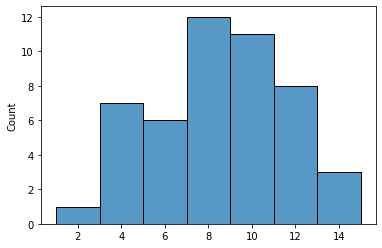

In [109]:
sns.histplot(data)

Como vemos, el tipo de distribución muestral sí es aproximadamente normal.

d) Valor del estadístico de prueba.

**R**: En este caso vamos a considerar al estadístico de prueba como el puntaje $z$ de la media muestral. Para resolver esto con Python, definamos una función para calcular el puntaje $z$ dado un conjunto de datos y la media esperada. Esto se basa en la siguiente fórmula:

$$z = \frac{\bar{x} - \mu_{\bar{x}}}{\sigma_{\bar{x}}}$$

In [110]:
def Z_score(data, mu):
    return (np.mean(data) - mu)/(np.std(data)/np.sqrt(len(data)))

A partir de esta función podemos encontrar el estadístico de prueba, recordemos que el valor de $\mu_{\bar{x}}$ en este caso es de 7. Entonces:

In [111]:
z = Z_score(data, 7)
print(f"z = {z}")

z = 2.5992596306669844


Con esto, ya establecemos que nuestro valor estadístico es $z = 2.599259... \approx 2.6$

e) Valor crítico

**R**: Nuestro valor crítico será el valor de $z$ cuya área adelante de él sea el 5% del total del área bajo la curva de la distribución normal. Esto es lo mismo que considerar el valor de $z_{1-0.05} = z_{0.95}$. Recordemos que estamos restando $\alpha$ a 1 porque esamos haciendo una prueba de cola derecha.

In [112]:
C = st.norm.ppf(.95)
print(f"C = z_0.95 = {C}")

C = z_0.95 = 1.6448536269514722


Por lo tanto nuestro valor crítico es $C = z_{0.95} = 1.64485... \approx 1.645$

f) Decisión

**R**: Como es una prueba de cola derecha, si $C \leq z = 2.6$, entonces rechazamos $H_0$. Podemos ver fácilmente cuál es el menor de los dos valores que tenemos con Python de la siguiente manera:

In [113]:
vals = {"C": C, "z": z}
minimum = min(vals, key=vals.get)

print("El valor más pequeño es:",min(vals, key=vals.get))
print(f"Se cumple que: {min(vals, key = vals.get)} < {max(vals,key=vals.get)}")

El valor más pequeño es: C
Se cumple que: C < z


Vemos que $C < z$, por lo tanto el puntaje $z$ de $\bar{x}$ cae en la región de rechazo de la distribución muestral. Esto implica que rechazamos la hipótesis nula, $H_0 : \mu \leq 7$, a favor de aceptar la hipótesis alternativa $H_1$ que es: $H_1 : \mu < 7$.

g) Tipo de error posible y probabilidad asociada, si es un error de tipo I.

**R**: Como lo que estamos haciendo es rechazar $H_0$, entonces existe la posibilidad de cometer un error de tipo I (rechazar $H_0$ y que sea cierta). La probabilidad de cometer este error de tipo I es de $\alpha = 0.05 = 5 \%$.

h) Valor de $p$

**R**: Recordemos nuestro puntaje $z$ que ya obtuvimos en incisisos anteriores. Solo basta con calcular el área bajo la curva de la cola derecha de la distribución normal con este valor de $z$. Vamos a restar el resultado a 1, porque el valor que nos devuelve Python es el área total del lado izquierdo, pero nosotros buscamos el área del lado derecho por estar haciendo una prueba de cola derecha. Esto lo hacemos de la siguiente manera

In [114]:
p = 1-st.norm.cdf(z)
print(f"p = {p}")

p = 0.004671254121982771


Concluimos que $p = 0.00467... \approx 0.0047$

2. Un periódico de una ciudad grande afirma que el 62 % de los votantes registrados estuvieron en contra del aborto. Una agencia de servicio social considera que la estimación es muy alta, por lo que decidió entrevistar a una muestra aleatoria de 500 votantes registrados y encontró que 290 se opusieron al aborto. Usar el nivel de significancia del 5 % en una prueba para determinar si la estimación del periódico es muy alta, y encuentra el valor de $p$.

a) $H_0$ y $H_1$

**R**: Lo que sospecha el problema es que el porcentaje de votos a favor se ve muy grande. Entonces lo que queremos determinar es si en realidad el valor de este porcentaje es menor al anunciado. Por lo que decimos que nuestra hipótesis alternativa es $H_1 : p < 0.62$. Por lo tanto la hipótesis nula es: $H_0 : p \geq 0.62$. En resumen:
$$H_0 : p \geq 0.62$$
$$H_1 : p < 0.62$$

b) $\alpha$ y el tipo de prueba

**R**: El valor de $\alpha$ es el de nuestro nivel de significancia. Por lo que decimos que $\alpha = 0.05$. Para el tipo de prueba, como $H_1$ tiene signo $<$, decimos que es una prueba direccional de cola izquierda.

c) Distribución muestral

**R**: El tipo de dsitribución muestral en nuestro problema va a depender del tamaño de nuestra población. Si se cumple que:

$$np \geq 5\;\text{y}\; n(1 − p) \geq 5$$

En este caso tenemos que $n = 500$ y $p = 0.62$. Comprobando que esto se cumpla en Python tenemos:

In [115]:
n = 500 
p = 0.62
print(f"np = {n*p}\nn(1-p) = {n*(1-p)}")

np = 310.0
n(1-p) = 190.0


Vemos que sí se cumplen ambas condiciones, entonces $n$ se puede considerar suficientemente grande y decir que la distribución muestral de $\hat{p}$ es aproximadamente normal.

d) Valor del estadístico de prueba 

**R**: En este caso vamos a usar el puntaje $z$ para $\hat{p}$. El valor de $\hat{p}$ es el porcentaje de votantes en contra del aborto en la última votación. Recordemos que había 290 en contra de éste de un total de 500 votantes. Entonces:

In [116]:
p_hat = (290)/500
print(f"p^ = {p_hat}")

p^ = 0.58


Recordemos que el puntaje $z$ a partir del estadístico se calcula de la siguiente manera:

$$
z = \frac{\hat{p}-p}{\sqrt{p(1-p)/n}}
$$

Definimos y aplicamos esta definición en Python:

In [117]:
z = (p_hat-p)/np.sqrt(p*(1-p)/n)
print(f"z = {z}")

z = -1.8427115179918707


Entonces nuestro valor estadístico de prueba es $z = -1.84271...\approx -1.84$.

e) Valor crítico

**R**: El valor crítico será el que tenga el 5% de área bajo la curva de la distribución normal por detrás de él. Esto es $z_{0.05}$. Calculándolo directamente en Python, tenemos:

In [118]:
C = st.norm.ppf(.05)
print(C)

-1.6448536269514729


El valor crítico es $z = -1.64485...\approx -1.645$

f) Decisión

**R**: Como estamos haciendo una prueba de cola izquierda, si $z \leq C$, entonces rechazamos $H_0$. Podemos ver directamente cuál es el menor de los dos valores en Python de la siguiente manera:

In [119]:
vals = {"C": C, "z": z}

print("El valor más pequeño es:",min(vals, key=vals.get))
print(f"Se cumple que: {min(vals, key = vals.get)} < {max(vals,key=vals.get)}")

El valor más pequeño es: z
Se cumple que: z < C


Como sucede que $z < C$, entonces el valor de $z$ cae en la región de rechazo. Esto implica que rechazamos $H_0 : p \geq 0.62$. Esto quiere decir que aceptamos la hipótesis $H_1 : p < 0.62$. Esto nos indica que probablemente el porcentaje de votantes en oposición al aborto indicado por el periódico sí era muy alto en las afirmaciones originales.

g) Tipo de error posible y probabilidad asociada, si es un error de tipo I.

**R**: Como lo que estamos haciendo es rechazar $H_0$, entonces existe la posibilidad de cometer un error de tipo I (rechazar $H_0$ y que sea cierta). La probabilidad de cometer este error de tipo I es de $\alpha = 0.05 = 5 \%$.

h) Valor de $p$

**R**: Usando el puntaje $z$ que obtuvimos anteriormente, encontramos el valor del área detrás de él en la curva de la distribución normal. En este caso no es necesario restarlo a 1 este valor porque la prueba es de cola izquierda y Python considera a éstas por defecto.

In [120]:
p = st.norm.cdf(z)
print(f"p = {p}")

p = 0.03268557071858775


Concluimos que $p = 0.032685... \approx 0.0327$.

3. Una compañía cervecera utiliza máquinas de llenado de latas de cerveza que dan una varianza máxima de 0.05 -la cantidad de cerveza en onzas-, para que las latas no estén más o menos llenas. Una muestra de los contenidos de 25 latas produjo $s^2 = 0.07$. Si las cantidades servidas se distribuyen normalmente, pongan a prueba la hip ́otesis nula $\sigma^2 \leq 0.05$ contra la hipótesis alternativa $\sigma^2 > 0.05$. Usar $\alpha = 0.05$.

a) $H_0$ y $H_1$

**R**: El mismo problema ya nos define que la hip ́otesis nula, $H_0$, es $H_0 : \sigma^2 \leq 0.05$. También nos da la alternativa: $H1 : \sigma^2 > 0.05$. En resumen:
$$
H_0 : \sigma^2 \leq 0.05
$$
$$
H_1 : \sigma^2 > 0.05
$$

b) $\alpha$ y el tipo de prueba

**R**: El valor de $\alpha$ nos lo da directamente el problema: $\alpha = 0.05$. Para el tipo de prueba, como el signo de $H_1$ es $>$, entonces decimos que es una prueba de hipótesis direccional de cola derecha.

c) Distribución muestral

**R**: Como estamos manejando los valores de $\sigma^2$ en nuestra hipótesis y además el problema nos indica que la distribución es aproximadamente normal, entonces decimos que tenemos una distribución muestral de tipo $\chi^2$.

d) Valor del estadístico de prueba

**R**: El estadístico de prueba para una distribución de tipo $\chi^2$ se define como:
$$
\chi^2 = \frac{(n-1)s^2}{\sigma^2}
$$

Ya conocemos los valores de $s^2 = 0.07$, $n=25$ y $\sigma^2 = 0.05$. Resolviendo esta función en Python obtenemos el valor de nuestro estadístico de prueba $\chi^2$:

In [122]:
n = 25
s2 = 0.07
sigma2 = 0.05

chi2 = (n-1)*s2/sigma2
print(f"chi^2 = {chi2}")

chi^2 = 33.6


Entonces concluimos que nuestro valor del estadístico de prueba es: $\chi^2 = 33.6$.

e) Valor crítico

**R**: Como el nivel de significancia es $\alpha = 0.05$, buscamos el valor crítico de la distribucion $\chi^2$ de Pearson en la con $gl = n − 1 = 25 − 1 = 24$ en Python. Recordemos que estamos en una prueba de cola derecha. Por esta razón, le tenemos que indicar a Python que calcule el valor crítico considerando $\alpha=1-0.05=0.95$ ya que éste trabaja normalmente con pruebas de cola izquierda. Para utilizar esto con pruebas de cola derecha basta hacer esta resta con 1. Esto lo hacemos de la siguiente manera:

In [123]:
C = st.chi2.ppf(.95, 24)
print(f"C = chi^2_(0.95)(24) = {C}")

C = chi^2_(0.95)(24) = 36.41502850180731


Entonces el valor crítico es $C = \chi^2_{0.05}(24) = 36.41502...\approx 36.42$.

f) Decisión

**R**: Como estamos haciendo una prueba de cola derecha, si $C \leq \chi^2$ entonces rechazamos $H_0$, de lo contrario la aceptamos. Verificamos qué caso ocurre con Python:

In [124]:
vals = {"C": C, "chi^2": z}

print("El valor más pequeño es:",min(vals, key=vals.get))
print(f"Se cumple que: {min(vals, key = vals.get)} < {max(vals,key=vals.get)}")

El valor más pequeño es: chi^2
Se cumple que: chi^2 < C


Como $C > \chi^2$, entonces el valor del estadístico de prueba cae en el área de aceptación. Esto implica que aceptamos la hipótesis nula $H_0$ y rechazamos a la alternativa $H_1 : \sigma^2 > 0.05$. En conlusión nuestra decisión es aceptar $H_0 : \sigma^2 \leq 0.05$.

g) Tipo de error posible y probabilidad asociada, si es un error de tipo I

**R**: Como lo que estamos haciendo es aceptar $H_0$, entonces existe la posibilidad de cometer un error de tipo II (no rechazar $H_0$ y ésta es falsa). Como es un error de tipo II, la probabilidad de cometerlo, $\beta$, es desconocida.

h) Valor de $p$

**R**: Para esto nos apoyamos en que tenemos $gl = 24$ y $\chi^2 =33.6$ para calcular directamente el valor de $p$ con Python. Recordemos que debemos restar esto a 1 porque Python considera el área a la izquierda de $\chi^2$, pero nuestro caso es uno de cola derecha y buscamos el área a la derecha de $\chi^2$.

In [125]:
p = 1 - st.chi2.cdf(chi2,24)
print(f"p = {p}")

p = 0.09203304678674706


Concluimos que el valor de $p$ es de $p = 0.092033...\approx 0.092$.

4. Las latas de nueces de una libra deben contener un peso neto de 16 onzas, pero hay una gran variabilidad. Una muestra aleatoria de seis latas de la marca de nueces A reveló los pesos netos siguientes en onzas: 16.1, 15.8, 15.1, 15.4, 16.1 y 16.2. Usar $\alpha = 0.01$ para determinar si el verdadero peso neto es diferente de 16 onzas.

a) $H_0$ y $H_1$

**R**: Queremos determinar si el verdadero peso neto es diferente de 16 onzas. También vamos a estar considerando la media de los pesos netos de la muestra. Por todo lo anterior decimos que nuestra hipótesis alternativa es $\mu \neq 16$. Y por lo tanto nuestra hipótesis nula es: $\mu = 16$. En resumen:

$$H_0 : \mu = 16$$
$$H_1 : \mu \neq 16$$

b) $\alpha$ y el tipo de prueba

**R** : El valor de $\alpha$ nos lo da el mismo problema. Es de $\alpha = 0.01$. En cuanto al tipo de prueba, como el signo de $H1$ es $\neq$, entonces decimos que es una prueba no direccional de dos colas.

c) Distribución muestral

**R**: Podemos observar cómo en este caso el tamaño de nuestra muestra es pequeña con $n = 6$. Como $n = 6 < 30$, y bajo la suposición de que la población es normal, decimos que la distribución es de tipo t de Student.

d)Valor del estadístico de prueba

**R**: El valor del estadístico de prueba será el de t que se define como:

$$
t = \frac{\bar{x} - \mu}{s/\sqrt{n}}
$$

A partir de esto hacemos una función que calcule este valor dado el conjunto de datos que tenemos y el valor de la media esperada. Ya conocemos nuestros datos por lo que plantea el problema y sabemos que $\mu = 16$. Entonces:

In [126]:
def t(data, mu):
    return (np.mean(data) - mu)/(np.std(data)/np.sqrt(len(data)))
data = [16.1, 15.8, 15.1, 15.4, 16.1, 16.2]
mu = 16
t = t(data,mu)
print(f"t = {t}")

t = -1.3076503392653462


Entonces el valor del estadístico de prueba es de $t = −1.30765...\approx -1.31$.

e) Valores críticos

**R**: Como estamos trabajando en una prueba de dos colas, nuestros valores críticos se encontrarán en $\pm t_{\alpha/2} = t_{0.01/2} = t_{0.005}$ para $gl = n − 1 = 6 − 1 = 5$. Esto lo obtenemos con Python de la siguiente forma:

In [127]:
C_1 = st.t.ppf(.005, df = 5)
C_2 = -1*C_1
print(f"C_1 = -t_0.005 = {C_1}\nC_2 = +t_0.005 = +{C_2}")

C_1 = -t_0.005 = -4.032142983557536
C_2 = +t_0.005 = +4.032142983557536


Entonces nuestros valores críticos son: $C_1 = −4.03214... \approx -4.032$ y $C_2 = +4.03214... \approx +4.032$.

f) Decisión

**R**: Si ocurre que $t \leq C_1$ ó $C_2 \leq t$, entonces vamos a tener que rechazar $H_0$. Evaluando las desigualdades en Python para los dos valores críticos tenemos:

In [128]:
vals1 = {"C_1": C_1, "t": t}
vals2 = {"C_2":C_2, "t": t}
print(f"Se cumple que: {min(vals1, key = vals1.get)} < {max(vals1,key=vals1.get)}")
print(f"y también que: {min(vals2, key = vals2.get)} < {max(vals2,key=vals2.get)}")

Se cumple que: C_1 < t
y también que: t < C_2


Como en este caso tenemos que $C_1 < t$ y que $t < C_2 $, entonces el valor del estadístico de prueba cae en el área de aceptación. Esto implica que aceptamos la hipótesis nula $H_0$ y rechazamos a la alternativa $H_1 : \mu \neq 16$. En
conclusión, nuestra decisión es aceptar $H_0 : \mu = 16$

g) Tipo de error posible y probabilidad asociada, si es un error de tipo I

**R**: Como estamos aceptando $H_0$, entonces existe la posibilidad de cometer un error de tipo II (no rechazar $H_0$ y ésta es falsa). Como es un error de tipo II, la probabilidad de cometerlo, $\beta$, es desconocida.

h) Valor de $p$

**R**: Usando el valor de $t$ que ya calculamos con $gl = 5$, calculamos este valor directamente Python. Además como es prueba de dos colas vamos a multiplicar el resultado por 2 para así obtener el área total bajo la curva que representa el valor de $p$.

In [129]:
p = st.t.cdf(t,5)*2
print(f"p = {p}")

p = 0.24788662512052492


En conclusión, el valor de $p$ es de $p = 0.247886...\approx 0.2479$.